In [1]:
#!pip install mido
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import mido
from mido import MidiFile

In [3]:
file = MidiFile('data/Midi #8.mid')

In [4]:
message = mido.Message('program_change', program=10)

In [7]:
import keras

/Users/yizhouhe/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
from keras.layers import LSTM, Dense, Dropout, Activation

In [9]:
sequence_length=20
sample_dim=1
pitchnames = sorted(set(item for item in notes))
# create a dictionary to map pitches to integers
note_to_int = dict((note, number) for number, note in enumerate(pitchnames))
network_input = []
network_output = []
# create input sequences and the corresponding outputs
for i in range(0, len(notes) - sequence_length, 1):
    sequence_in = notes[i:i + sequence_length]
    sequence_out = notes[i + sequence_length]

    network_input.append([note_to_int[char] for char in sequence_in])
    network_output.append(note_to_int[sequence_out])
n_patterns = len(network_input)
# reshape the input into a format compatible with LSTM layers
network_input = numpy.reshape(network_input, (n_patterns, sequence_length, sample_dim))
# normalize input
# network_input = network_input / float(n_vocab)
network_output = keras.utils.to_categorical(network_output)
n_catalogue=network_output.shape[1]
print (n_catalogue)
print (note_to_int)

13
{31: 0, 34: 1, 36: 2, 38: 3, 41: 4, 43: 5, 46: 6, 48: 7, 50: 8, 53: 9, 67: 10, 69: 11, 70: 12}


In [32]:
output_note=[list(note_to_int.keys())[arg] for arg in np.argmax(prediction, axis=1)]

In [33]:
print (output_note)

[70, 70, 46, 34, 41, 48, 67, 67, 67, 67, 67, 67, 67, 67, 69, 69, 70, 70, 69, 69, 36, 48, 43, 67, 67, 67, 67, 67, 70, 69, 69, 69, 70, 70, 69, 69, 67, 67, 50, 43, 43, 31, 67, 67, 67, 67, 69, 69, 70, 70, 46, 31, 46, 34, 67, 67, 67, 67, 69, 69, 70, 70, 46, 34, 41, 48, 67, 67, 67, 67, 67, 67, 67, 67, 69, 69, 70, 70, 69, 69, 36, 53, 43, 67, 38, 67, 67, 67, 38, 38, 41, 41, 70, 70, 69, 69, 70, 70, 69, 69, 67, 67, 53, 41]


In [34]:
print (notes)

[70, 70, 46, 34, 36, 48, 67, 67, 67, 67, 67, 67, 67, 67, 69, 69, 70, 70, 69, 69, 36, 48, 50, 38, 67, 67, 67, 67, 70, 70, 69, 69, 70, 70, 69, 69, 67, 67, 50, 38, 43, 31, 67, 67, 67, 67, 69, 69, 70, 70, 43, 31, 46, 34, 67, 67, 67, 67, 69, 69, 70, 70, 46, 34, 41, 53, 67, 67, 67, 67, 67, 67, 67, 67, 69, 69, 70, 70, 69, 69, 41, 53, 67, 50, 38, 67, 67, 67, 50, 38, 53, 41, 70, 70, 69, 69, 70, 70, 69, 69, 67, 67, 53, 41]


In [35]:
print (np.sum(np.array([1 for x,y in zip(output_note,notes) if x==y]))/len(output_note))

0.8846153846153846


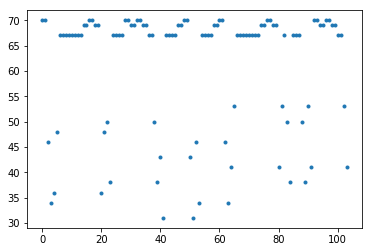

In [36]:
plt.plot(notes,'.')

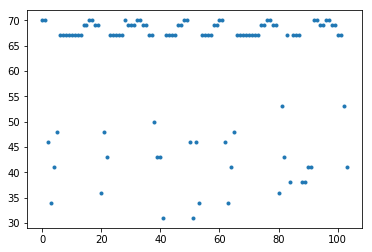

In [37]:
plt.plot(output_note,'.')

In [38]:
notes = notes[20:]

In [39]:
notes

[36,
 48,
 50,
 38,
 67,
 67,
 67,
 67,
 70,
 70,
 69,
 69,
 70,
 70,
 69,
 69,
 67,
 67,
 50,
 38,
 43,
 31,
 67,
 67,
 67,
 67,
 69,
 69,
 70,
 70,
 43,
 31,
 46,
 34,
 67,
 67,
 67,
 67,
 69,
 69,
 70,
 70,
 46,
 34,
 41,
 53,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 69,
 69,
 70,
 70,
 69,
 69,
 41,
 53,
 67,
 50,
 38,
 67,
 67,
 67,
 50,
 38,
 53,
 41,
 70,
 70,
 69,
 69,
 70,
 70,
 69,
 69,
 67,
 67,
 53,
 41]

In [41]:
zip(notes,output_note)

In [25]:
len(notes)

104

In [27]:
def func(y_true,y_pred):
    return np.dot(y_true-y_pred,y_true-y_pred)